In [10]:
%matplotlib inline
import sys
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle 
import numpy as np
import cv2

with open('./traffic-signs-data/train.p', 'rb') as f:
    train_images = pickle.load(f)
with open('./traffic-signs-data/valid.p', 'rb') as f:
    valid_images = pickle.load(f)
with open('./traffic-signs-data/test.p', 'rb') as f:
    test_images = pickle.load(f)
    
train_features, train_label = train_images['features'], train_images['labels']

valid_features, valid_label = valid_images['features'], valid_images['labels']

test_features, test_label = test_images['features'], test_images['labels']




In [11]:
with open('./traffic-signs-data/aug_images.p', 'rb') as f:
    aug_images = pickle.load(f)
with open('./traffic-signs-data/aug_labels.p', 'rb') as f:
    aug_labels = pickle.load(f)
    f.close()

In [12]:
print(aug_images.shape)

(10440, 32, 32, 3)


In [19]:

train_features_dag = np.append(train_features, aug_images, axis=0)
train_labels_dag = np.append(train_label, aug_labels, axis=0)

In [20]:
train_features_dag = np.append(train_features_dag, aug_images_other, axis=0)
train_labels_dag = np.append(train_labels_dag, aug_labels_other, axis=0)

In [21]:
print(train_features_dag.shape)

(48884, 32, 32, 3)


In [ ]:
print(train_labels_dag.shape)


In [ ]:
plt.imshow(train_features_dag[45709])
#print(train_features_dag[25710])
print(train_labels_dag[45709])

In [118]:
import pandas as pd

df = pd.read_csv('signnames.csv')
df2 = pd.DataFrame(train_labels_dag)


In [120]:
label=15
df.loc[label,'SignName']

'No vehicles'

0     324
19    324
37    324
27    378
32    378
41    378
42    378
24    432
29    432
21    486

In [ ]:
df2 = df2.rename(columns={0: "a"})

#k = df2.query('a==20') #25950 to 26249
#k = df2.query('a==0') #9960 to 10139
#k = df2.query('a==19') #6630 to 6809
#k = df2.query('a==37') #4830 to 5009
#k = df2.query('a==27') # 10350 to 10559
#k = df2.query('a==32') # 10140 to 10349
k = df2.query('a==41') #0to 209
#k = df2.query('a==42') #9750to 9959
#k = df2.query('a==24') #10800 to 11039
#k = df2.query('a==29') #10560 to 10799
#k = df2.query('a==21') #25680 to 25949

In [ ]:
pd.set_option('display.max_rows', 2000)
k

In [ ]:
from random import randint # to generate random positive integers between a range of numbers
fig =plt.figure(figsize=(15,15))
#for img in range(25680,55554):
for a in range(1,101):
    img = randint(34799,34860)    
    fig.add_subplot(10,10,a)
    plt.imshow(train_features_dag[img])

Data augmentation stratergy

horizontal flip -> np.fliplr
vertical flip->np.flipup
Blurring-> using Gaussian smoothing method -> will be using skimage lib
scale(0.5,0.5) rot =  -0.2
scale(1,1) rot =0.5
scale(1,1) rot =-0.5
scale(0.5,0.5) rot =0 --> add translation 
scale(1,1.8), rot=0

Loop through every 4 images in the train_data and generate above augmented images

In [14]:
# Data Augmentation
from skimage import filters as ski_fil
from skimage import transform as ski_tr

def image_generator(image_features, image_labels, start=None, end=None, hop=10):
        if end is None:
            end=len(image_features)
        if start is None:
            start=0
    
        aug_labels =np.zeros(0, dtype=np.uint8)
        aug_images_temp = np.zeros((32,32,3),dtype=np.uint8)
        aug_images = np.zeros((0,32,32,3),dtype=np.uint8)
        
        for i in range(start, end, hop):
            #print(i)
            
            
            # Horizontal_flip
            #a1 = np.fliplr(image_features[i]) 
            #aug_labels = np.append(aug_labels, image_labels[i])
            
            # Vertical flip
            #a2 = np.flipud(image_features[i])
            #aug_labels = np.append(aug_labels, image_labels[i])
            
            # Image blur
            a3 = ski_fil.gaussian(image_features[i], sigma=1, multichannel=True) 
            aug_labels = np.append(aug_labels, image_labels[i])
            
            # Orignal image rotation 0.5
            tform = ski_tr.AffineTransform(scale=(1, 1), rotation=0.5, translation=(0, 0))
            a4 = ski_tr.warp(image_features[i], tform.inverse)
            aug_labels = np.append(aug_labels, image_labels[i])
            
            # Orignal image rotation -0.5
            tform = ski_tr.AffineTransform(scale=(1, 1), rotation=-0.5, translation=(0, 0))
            a5 = ski_tr.warp(image_features[i], tform.inverse)
            aug_labels = np.append(aug_labels, image_labels[i])
            
            ## Downscaling image 0.5x0.5 and rotation -0.2
            #tform = ski_tr.AffineTransform(scale=(0.5, 0.5), rotation=-0.2, translation=(0, 0))
            #a6 = ski_tr.warp(image_features[i], tform.inverse)
            #aug_labels = np.append(aug_labels, image_labels[i])
            
            # Downscaling image 0.5x0.5 and translation 5,-3
            #tform = ski_tr.AffineTransform(scale=(0.5, 0.5), rotation=0, translation=(5, -3))
            #a7 = ski_tr.warp(image_features[i], tform.inverse)
            #aug_labels = np.append(aug_labels, image_labels[i])
            
            # Image streching 
            #tform = ski_tr.AffineTransform(scale=(1, 1.8), rotation=0, translation=(0, 0))
            #a8 = ski_tr.warp(image_features[i], tform.inverse)
            #aug_labels = np.append(aug_labels, image_labels[i])
            
            aug_images_temp = np.vstack(([a3],[a4],[a5]))
            aug_images = np.append(aug_images, aug_images_temp,axis=0)
            
        return aug_images, aug_labels
    
aug_images, aug_labels  = image_generator(train_features, train_label) 


    

In [ ]:
#k = df2.query('a==20') #25950 to 26249
#k = df2.query('a==0') #9960 to 10139
#k = df2.query('a==19') #6630 to 6809
#k = df2.query('a==37') #4830 to 5009
#k = df2.query('a==27') # 10350 to 10559
#k = df2.query('a==32') # 10140 to 10349
#k = df2.query('a==41') #0to 209
#k = df2.query('a==42') #9750to 9959
#k = df2.query('a==24') #10800 to 11039
#k = df2.query('a==29') #10560 to 10799
#k = df2.query('a==21') #25680 to 25949

In [15]:
aug_images_20, aug_labels_20  = image_generator(train_features, train_label, 25950, 26249, 2) 
aug_images_0, aug_labels_0    = image_generator(train_features, train_label, 9960, 10139, 2) 
aug_images_19, aug_labels_19  = image_generator(train_features, train_label, 6630, 6809, 2) 
aug_images_37, aug_labels_37  = image_generator(train_features, train_label, 4830, 5009, 2) 
aug_images_27, aug_labels_27  = image_generator(train_features, train_label, 10350, 10559, 2) 
aug_images_32, aug_labels_32  = image_generator(train_features, train_label, 10140, 10349, 2) 
aug_images_41, aug_labels_41  = image_generator(train_features, train_label, 0, 209, 2) 
aug_images_42, aug_labels_42  = image_generator(train_features, train_label, 9750, 9959, 2) 
aug_images_24, aug_labels_24  = image_generator(train_features, train_label, 10800, 11039, 2) 
aug_images_29, aug_labels_29  = image_generator(train_features, train_label, 10560, 10799, 2) 
aug_images_21, aug_labels_21  = image_generator(train_features, train_label, 25680, 25949, 2) 



In [16]:
aug_images_other = np.vstack((aug_images_20, aug_images_0,aug_images_19, aug_images_37,aug_images_27, aug_images_32,\
                              aug_images_41,aug_images_42,aug_images_24, aug_images_29, aug_images_21))

In [17]:
aug_labels_other = np.hstack((aug_labels_20, aug_labels_0,aug_labels_19, aug_labels_37,aug_labels_27, aug_labels_32,\
                              aug_labels_41,aug_labels_42,aug_labels_24, aug_labels_29, aug_labels_21))

In [18]:
print(aug_images_other.shape)
print(aug_labels_other.shape)

(3645, 32, 32, 3)
(3645,)


In [ ]:
#aug_lab_df = pd.DataFrame(aug_labels_other)

#aug_lab_df

In [ ]:
print(aug_images_20.shape)
print(aug_images_0.shape)
print(aug_images_19.shape)
print(aug_images_37.shape)
print(aug_images_27.shape)
print(aug_images_32.shape)
print(aug_images_41.shape)
print(aug_images_42.shape)
print(aug_images_24.shape)
print(aug_images_29.shape)
print(aug_images_21.shape)

In [ ]:
print(aug_labels_20.shape)
print(aug_labels_0.shape)
print(aug_labels_19.shape)
print(aug_labels_37.shape)
print(aug_labels_27.shape)
print(aug_labels_32.shape)
print(aug_labels_41.shape)
print(aug_labels_42.shape)
print(aug_labels_24.shape)
print(aug_labels_29.shape)
print(aug_labels_21.shape)

In [ ]:
plt.imshow(aug_images_27[7])
print(aug_labels_27[7])

In [ ]:
with open('./traffic-signs-data/aug_images.p', 'wb') as f:
    pickle.dump(aug_images, f)
    f.close()  
with open('./traffic-signs-data/aug_labels.p', 'wb') as f:
    pickle.dump(aug_labels,f)
    f.close()

In [ ]:
k=df2.query(20)

In [ ]:
k

In [ ]:
plt.imshow(train_features_dag[25680])

In [ ]:
k


In [ ]:
k.tail()

In [140]:
df2.head()

,0
0,41
1,41
2,41
3,41
4,41


In [141]:
df2.columns = ['ClassId']
df2 = df2.merge(df, on='ClassId', how='left') # merging a column into another df 

In [142]:
df3=df2.groupby(['ClassId']).count() #group by and getting unique count of each class

print(df3)
df3.describe()

         SignName
ClassId          
0             504
1            2574
2            2613
3            1638
4            2301
5            2145
6             468
7            1677
8            1638
9            1716
10           2340
11           1521
12           2457
13           2496
14            897
15            702
16            468
17           1287
18           1404
19            504
20            840
21            756
22            429
23            585
24            672
25           1755
26            702
27            588
28            624
29            672
30            507
31            897
32            588
33            779
34            468
35           1404
36            429
37            504
38           2418
39            351
40            390
41            588
42            588


,SignName
count,43.000000
mean,1136.837209
std,744.765061
min,351.000000
25%,546.000000
50%,756.000000
75%,1657.500000
max,2613.000000


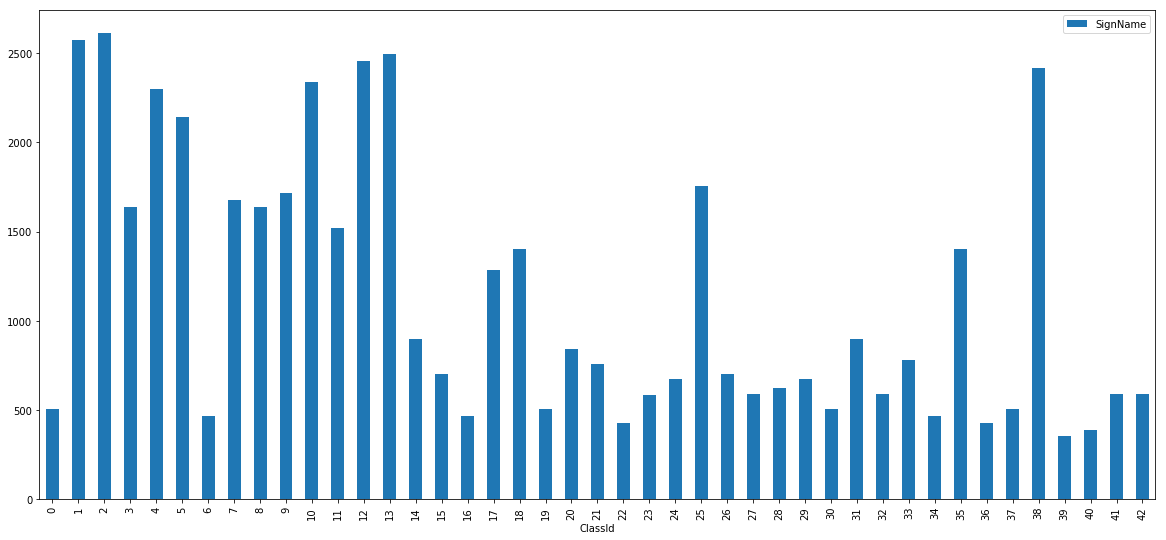

In [143]:
plt.rcParams['figure.figsize'] = (20,9) #increasing the size of the plot figure
df3.plot(kind='bar')


In [144]:
df4=df2.groupby(['SignName']).count() #group by and getting unique count of each class
df4['ClassNames'] = df4.index 
print(df4)
df4.describe()


                                                    ClassId  \
SignName                                                      
Ahead only                                             1404   
Beware of ice/snow                                      507   
Bicycles crossing                                       672   
Bumpy road                                              429   
Children crossing                                       624   
Dangerous curve to the left                             504   
Dangerous curve to the right                            840   
Double curve                                            756   
End of all speed and passing limits                     588   
End of no passing                                       588   
End of no passing by vehicles over 3.5 metric tons      588   
End of speed limit (80km/h)                             468   
General caution                                        1404   
Go straight or left                                    

,ClassId
count,43.000000
mean,1136.837209
std,744.765061
min,351.000000
25%,546.000000
50%,756.000000
75%,1657.500000
max,2613.000000


In [145]:
df3['SignName'].nlargest(10) # Top 10 classes

ClassId
2     2613
1     2574
13    2496
12    2457
38    2418
10    2340
4     2301
5     2145
25    1755
9     1716
Name: SignName, dtype: int64

In [146]:
df3['SignName'].nsmallest(10) # last 10 classes

ClassId
39    351
40    390
22    429
36    429
6     468
16    468
34    468
0     504
19    504
37    504
Name: SignName, dtype: int64

In [147]:
plt.rcParams['figure.figsize'] =(10,6)

In [ ]:
print(train_features_dag[0].dtype)
print(valid_features[0].dtype)

In [ ]:
from random import randint # to generate random positive integers between a range of numbers
fig =plt.figure(figsize=(15,15))
for a in range(1,101):
    rand_img = randint(0, 48800)
    fig.add_subplot(10,10,a)
    plt.imshow(train_features_dag[rand_img])
    

In [ ]:
fig =plt.figure(figsize=(5,1))

plt.title('Label: '+str(df2.loc[0,'ClassId']) +' | '+ df2.loc[0,'SignName'])
print(rand_img)
for a in range(1,6):
    rand_img = randint(0, 10)
    #print(rand_img)
    fig.add_subplot(1,5,a)
    plt.imshow(train_features_dag[rand_img])
    

/Users/wajid/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


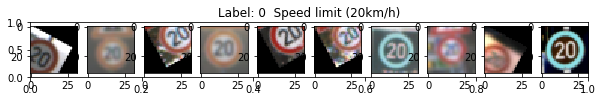

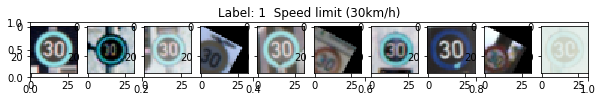

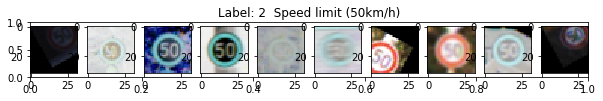

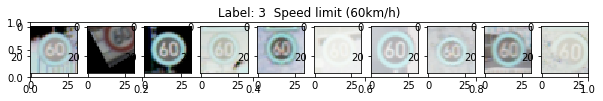

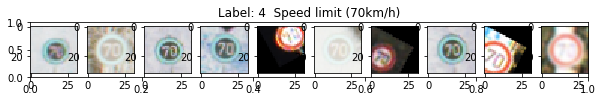

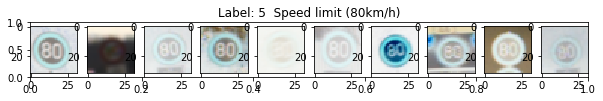

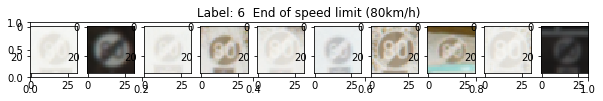

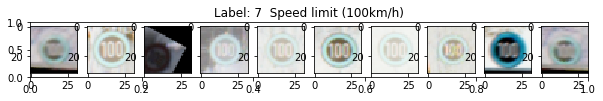

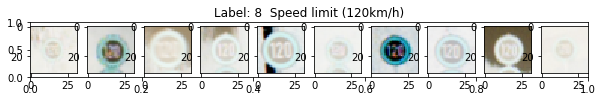

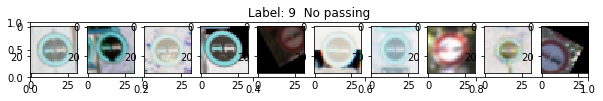

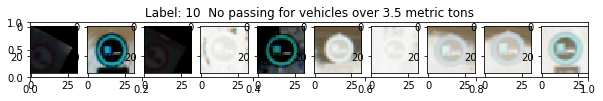

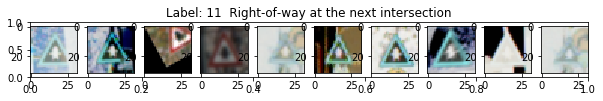

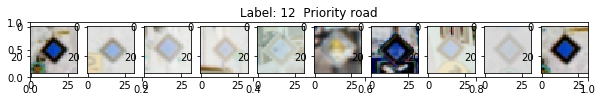

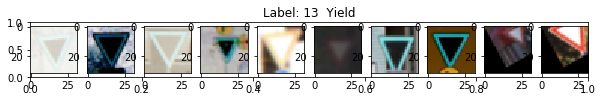

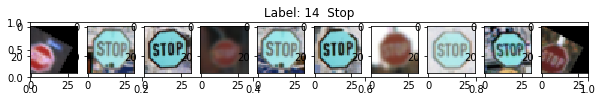

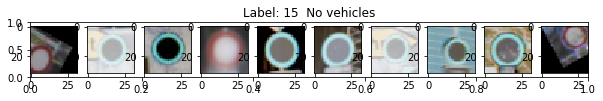

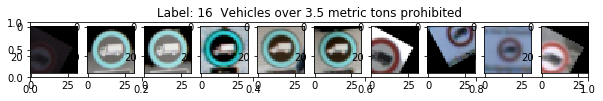

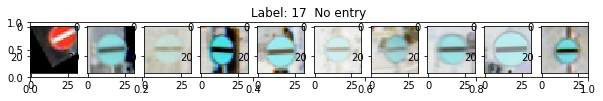

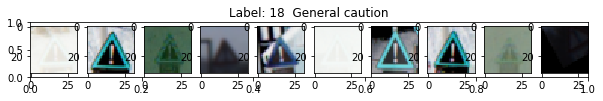

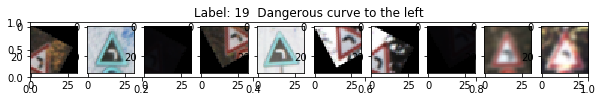

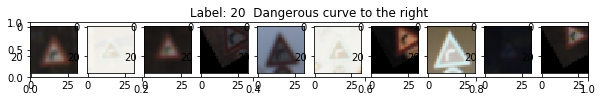

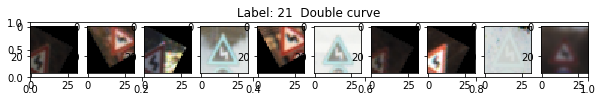

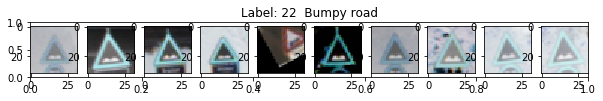

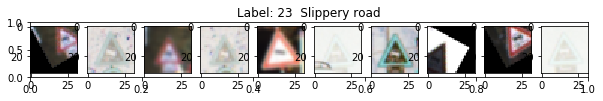

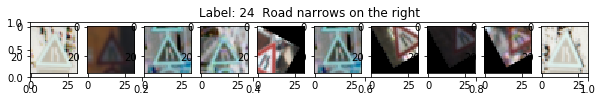

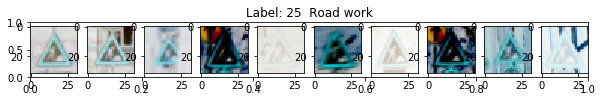

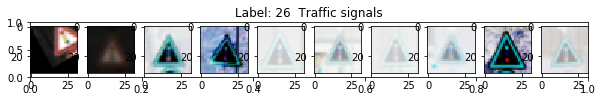

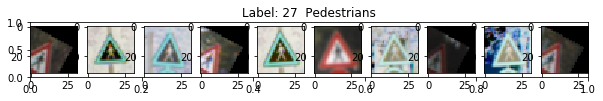

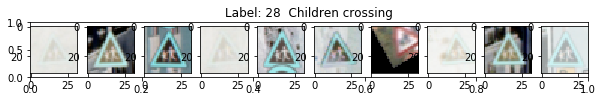

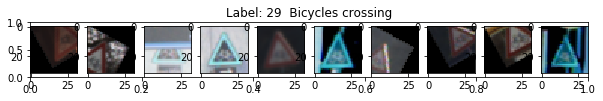

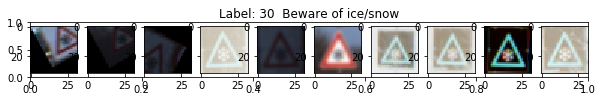

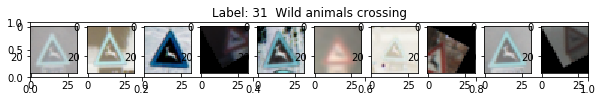

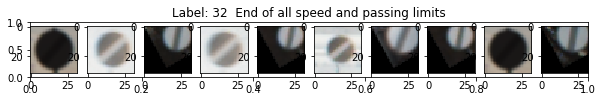

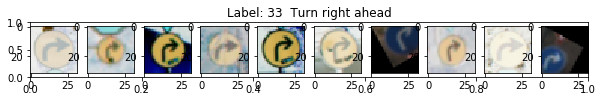

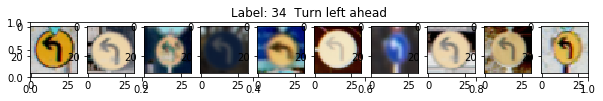

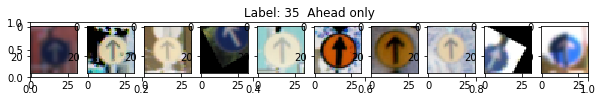

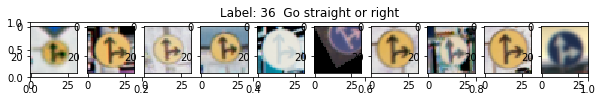

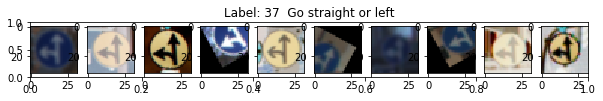

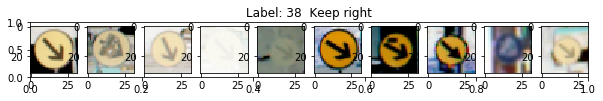

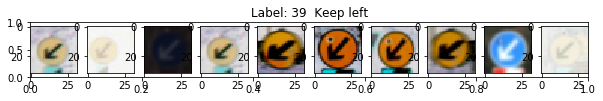

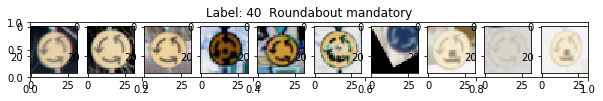

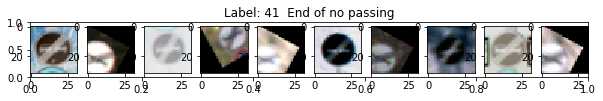

In [149]:
from random import randint
for label in range(0,42):
    fig = plt.figure(figsize=(10,1))
    #plt.axes(frameon=False)

    df_filtered = df2.query('ClassId==@label') #filtering the dataframe for specific label and storing it in df_filtered
    plt.title('Label: '+str(label)+'  '+str(df.loc[label,'SignName']))
    for img in range(1,11):
        rand2 = randint(0, len(df_filtered))
        fig.add_subplot(1,10,img)
        plt.imshow(train_features_dag[df_filtered.index[rand2-1]])


In [ ]:
from skimage import color


x_train =np.zeros((len(train_features_dag),32,32))
x_valid =np.zeros((len(valid_features),32,32))
x_test =np.zeros((len(test_features),32,32))


'''''
for i in range(0, (len(train_features))):
    x_train[i] = cv2.cvtColor(train_features[i], cv2.COLOR_RGB2GRAY)
for i in range(0, (len(valid_features))):
    x_valid[i] = cv2.cvtColor(valid_features[i], cv2.COLOR_RGB2GRAY)
for i in range(0, (len(test_features))):
    x_test[i] = cv2.cvtColor(test_features[i], cv2.COLOR_RGB2GRAY) '''''


In [ ]:
x_train = color.rgb2gray(train_features_dag)

In [ ]:
x_valid = color.rgb2gray(valid_features)
x_test = color.rgb2gray(test_features)


In [ ]:
print(x_train.shape)

In [28]:
def normalize(x):
    for i in range(0, len(x)):
        pmean=np.mean(x[i])
        #print(pmean)
        pstd=np.std(x[i])
        #print(pstd)
        x[i] = (x[i] - pmean)/pstd
    return x

def min_max_scaling(x):

    for i in range(0,len(x)):
        pmin = np.min(x[i])
        pmax = np.max(x[i])
        x[i] = (x[i]-pmin)/(pmax-pmin)
    return x


In [ ]:
x_train = normalize(x_train)

In [ ]:
x_train = min_max_scaling(x_train)

In [ ]:
print(x_train[48460])
#plt.imshow(x_train[62621])

In [ ]:
fig =plt.figure(figsize=(15,15))
for a in range(1,101):
    rand_img = randint(0, 48880)
    fig.add_subplot(10,10,a)
    plt.imshow(x_train[rand_img], cmap='gray')

In [ ]:
plt.imshow(x_train[0], cmap='gray')

In [ ]:
from skimage import exposure as e

inp = x_train[0]
outt = e.equalize_hist(inp)
plt.imshow(outt, cmap='gray')

In [29]:
from skimage import exposure as e

def adapt_equalize(img_list):
    for i in range(0, len(img_list)):
        img_list[i] = e.equalize_adapthist(img_list[i],clip_limit=0.05)
    return img_list
def equalize(img_list):
    for i in range(0, len(img_list)):
        img_list[i] = e.equalize_hist(img_list[i])
    return img_list


In [ ]:
x_valid = normalize(x_valid)
x_valid = min_max_scaling(x_valid)
x_test = normalize(x_test)
x_test = min_max_scaling(x_test)

In [ ]:
x_train = adapt_equalize(x_train)
x_valid = adapt_equalize(x_valid)
x_test = adapt_equalize(x_test)

In [ ]:
with open('./traffic-signs-data/x_train.p', 'wb') as f:
    pickle.dump(x_train, f)
    f.close()
with open('./traffic-signs-data/x_valid.p', 'wb') as f:
    pickle.dump(x_valid, f)
with open('./traffic-signs-data/x_test.p', 'wb') as f:
    pickle.dump(x_test, f)
    f.close()

In [3]:
with open('./traffic-signs-data/x_train.p', 'rb') as f:
    x_train = pickle.load(f)
with open('./traffic-signs-data/x_valid.p', 'rb') as f:
    x_valid = pickle.load(f)
with open('./traffic-signs-data/x_test.p', 'rb') as f:
    x_test = pickle.load(f)

In [ ]:
fig =plt.figure(figsize=(15,15))
for a in range(1,101):
    rand_img = randint(0, 4000)
    fig.add_subplot(10,10,a)
    plt.title(valid_label[rand_img])
    plt.imshow(x_valid1[rand_img], cmap='gray')

In [ ]:
fig =plt.figure(figsize=(15,15))
for a in range(1,101):
    rand_img = randint(0, 48000)
    fig.add_subplot(10,10,a)
    plt.title(train_labels_dag[rand_img])
    plt.imshow(x_train[rand_img], cmap='gray')
    

In [23]:
x_train= x_train.reshape(x_train.shape + (1,))
x_valid= x_valid.reshape(x_valid.shape + (1,))
x_test= x_test.reshape(x_test.shape + (1,))

print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)


(48884, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


In [4]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten
#x_train =np.zeros((len(train_features),32,32))

EPOCHS = 20
BATCH_SIZE = 128

def LeNet(x,dropout_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    keep_prob = dropout_prob
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6. 12
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 12), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(12))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.dropout(conv1, keep_prob)
    # SOLUTION: Pooling. Input = 28x28x12. Output = 14x14x12.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16. 24
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 12, 24), mean = mu, stddev = sigma)) #(5,5,6,16)
    conv2_b = tf.Variable(tf.zeros(24)) #16
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.dropout(conv2, keep_prob)

    # SOLUTION: Pooling. Input = 10x10x16.24 Output = 5x5x16. 24
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16.24 Output = 400. 600
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. 600 Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(600, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma)) #changed here
    fc3_b  = tf.Variable(tf.zeros(43)) #changed here
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits, conv1, conv2



In [5]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

x = tf.placeholder(tf.float32, (None, 32, 32,1))
y = tf.placeholder(tf.int32, (None))
dropout_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

rate = 0.001

logits, conv1, conv2 = LeNet(x, dropout_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [167]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

pred = tf.argmax(logits,1)
label = tf.argmax(one_hot_y,1)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        p, l = sess.run([pred, label], feed_dict={x: batch_x, y: batch_y, dropout_prob:1})
        #total_accuracy += (accuracy * len(batch_x))
    #return total_accuracy / num_examples
    return p, l



In [7]:
def print_activations(X_data):
    saver.restore(sess, tf.t
    c1,c2= sess.run([conv1, conv2], feed_dict={x:X_data[0:1],dropout_prob:1})
    print(c1.shape)
    #plt.imshow(c1[0,:,:,1], cmap='gray')
    print(c2.shape)
    #print(fc1.shape)

    fig1 = plt.figure(figsize= (6,1))
    plt.title('conv1 activations')
    for img in range(1,6):
        fig.add_subplot(6,1,3)
        plt.imshow(c1[0,:,:,img], cmap='gray')
    fig2 = plt.figure(figsize= (6,1))
    plt.title('conv2 activations')
    for img in range(1,6):
        fig2.add_subplot(1,6,img)
        plt.imshow(c2[0,:,:,img], cmap='gray')
 

In [163]:
def print_somevar(X_data, y_data):
    final_p=np.zeros(0)
    final_l=np.zeros(0)
    num_examples = len(X_data)
    with tf.Session() as sess:
        saver.restore(sess, './lenet')
        for offset in range(0, num_examples, BATCH_SIZE):
            batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
            predict, lab =sess.run([pred, label], feed_dict={x: batch_x, y: batch_y, dropout_prob:1})
            final_p = np.append(final_p,predict)
            final_l=np.append(final_l,lab)
    return final_p, final_l        
    

In [164]:
p, l = print_somevar(x_web,web_label)

TypeError: Fetch argument 41 has invalid type <class 'int'>, must be a string or Tensor. (Can not convert a int into a Tensor or Operation.)

In [165]:
print(p)
print(l)

[ 15.  25.   8.  25.   4.]
[ 14.  17.   1.   2.  28.]


In [112]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(l, p,  average=None)
recall = recall_score(l, p,  average=None)

/Users/wajid/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/wajid/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


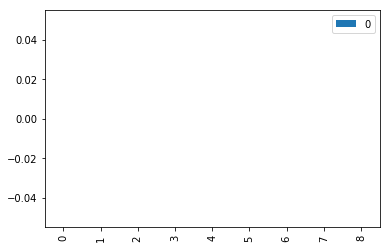

In [114]:
import pandas as pd

df_pre = pd.DataFrame(precision)
df_pre.plot(kind='bar')

In [ ]:
df_pre.head()
df_pre[0].nsmallest(10)

In [ ]:
df3['SignName'].nsmallest(10)

In [ ]:
df3.plot(kind='bar')


In [ ]:
df_re = pd.DataFrame(recall)
df_re.plot(kind='bar')
df_re[0].nsmallest(10)

In [ ]:
with tf.Session() as sess:
    
    onehot = sess.run(one_hot_y, feed_dict={y:train_labels_dag})
    print(onehot.shape)
    onehot1 = onehot[0:100]

In [ ]:
print(onehot[1000:1010,30:40])

In [24]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(x_train) #changed here
    k=0
    print("Training...")
    for i in range(EPOCHS):
        k=k+1
        X_train, y_train = shuffle(x_train, train_labels_dag) # changed here
        for offset in range(0, num_examples, BATCH_SIZE): # start from zero to batch_size until num_examples 
            #print('offset= ', offset)
            end = offset + BATCH_SIZE
            #print('end= ', end)
            batch_x, batch_y = X_train[offset:end], y_train[offset:end] 
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, dropout_prob:0.6})
        
        validation_accuracy = evaluate(x_valid, valid_label) #changed here
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
       
    saver.save(sess, './lenet')
    sess.close()
    print("Model saved")

Training...
EPOCH 1 ...
Validation Accuracy = 0.773
EPOCH 2 ...
Validation Accuracy = 0.885
EPOCH 3 ...
Validation Accuracy = 0.916
EPOCH 4 ...
Validation Accuracy = 0.940
EPOCH 5 ...
Validation Accuracy = 0.953
EPOCH 6 ...
Validation Accuracy = 0.955
EPOCH 7 ...
Validation Accuracy = 0.954
EPOCH 8 ...
Validation Accuracy = 0.958
EPOCH 9 ...
Validation Accuracy = 0.965
EPOCH 10 ...
Validation Accuracy = 0.966
EPOCH 11 ...
Validation Accuracy = 0.968
EPOCH 12 ...
Validation Accuracy = 0.967
EPOCH 13 ...
Validation Accuracy = 0.964
EPOCH 14 ...
Validation Accuracy = 0.963
EPOCH 15 ...
Validation Accuracy = 0.969
EPOCH 16 ...
Validation Accuracy = 0.967
EPOCH 17 ...
Validation Accuracy = 0.966
EPOCH 18 ...
Validation Accuracy = 0.972
EPOCH 19 ...
Validation Accuracy = 0.973
EPOCH 20 ...
Validation Accuracy = 0.971
Model saved


In [ ]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    num_examples = len(x_train) #changed here
    print("Training...")
    for i in range(EPOCHS):
        X_train, y_train = shuffle(x_train, train_labels_dag) # changed here
        for offset in range(0, num_examples, BATCH_SIZE): # start from zero to batch_size until num_examples 
            #print('offset= ', offset)
            end = offset + BATCH_SIZE
            #print('end= ', end)
            batch_x, batch_y = X_train[offset:end], y_train[offset:end] 
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, dropout_prob:0.6})
        
        validation_accuracy = evaluate(x_valid, valid_label) #changed here
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
       
    saver.save(sess, './lenet')
    sess.close()
    print("Model saved")

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    num_examples = len(x_train) #changed here
    print("Training...")
    for i in range(EPOCHS):
        X_train, y_train = shuffle(x_train, train_labels_dag) # changed here
        for offset in range(0, num_examples, BATCH_SIZE): # start from zero to batch_size until num_examples 
            #print('offset= ', offset)
            end = offset + BATCH_SIZE
            #print('end= ', end)
            batch_x, batch_y = X_train[offset:end], y_train[offset:end] 
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, dropout_prob:0.6})
        
        validation_accuracy = evaluate(x_valid, valid_label) #changed here
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
       
    saver.save(sess, './lenet')
    sess.close()
    print("Model saved")

In [121]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(x_test, test_label)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.959


In [ ]:
a = [1,2,3,4,5]

def pickle_dump(data, filename = 'newfile.p'):
    
    path = './traffic-signs-data/'+filename
    
    with open(path, 'wb') as f:
        pickle.dump(data, f)
        f.close()
        
def pickle_load(filename = 'newfile.p'):
    
    path = './traffic-signs-data/'+filename

    with open(path, 'rb') as f:
        data = pickle.load(f)
        f.close()
    return data

pickle_dump(a, 'a.p')
data = pickle_load('a.p')


In [150]:
import glob
images = glob.glob('./web_images/img*.jpeg')



In [151]:
images

['./web_images/img4.jpeg',
 './web_images/img5.jpeg',
 './web_images/img2.jpeg',
 './web_images/img3.jpeg',
 './web_images/img1.jpeg']

In [152]:
web_images =np.zeros((len(images),32,32,3))
for fname, i in zip(images, range(len(images))):
    temp= plt.imread(fname)
    wb_images= ski_tr.rescale(temp, 0.3, mode='reflect')
    web_images[i] = ski_tr.resize(wb_images, (32,32,3))



/Users/wajid/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/wajid/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/wajid/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/wajid/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode

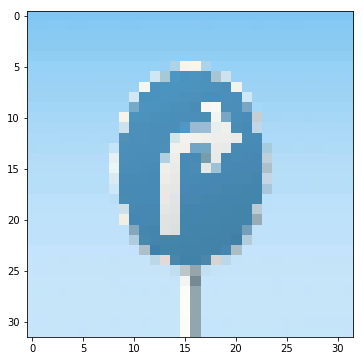

In [153]:
plt.imshow(web_images[4])

In [154]:
from skimage import color


x_web = color.rgb2gray(web_images)
x_web = normalize(x_web)
x_web = min_max_scaling(x_web)
x_web = adapt_equalize(x_web)



/Users/wajid/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


In [155]:
web_label = np.array((11, 11, 34, 34, 33), dtype=np.uint8)
#33,34,4,8,11

11


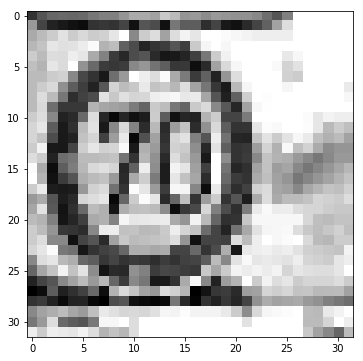

In [174]:
plt.imshow(x_web[3].squeeze(),cmap='gray')
print(web_label[0])

In [157]:
x_web= x_web.reshape(x_web.shape + (1,))



In [138]:

print(p)
print(l)

[ 15.  25.   8.  25.   4.]
[ 14.  17.   1.   2.  28.]


(5, 32, 32, 1)
(5,)
(12630, 32, 32, 1)
(12630,)


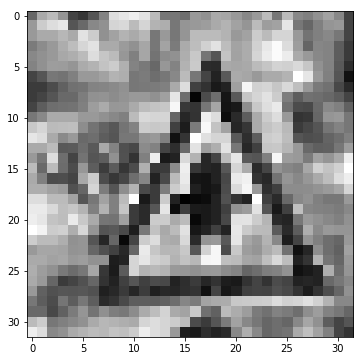

In [158]:
print(x_web.shape)
print(web_label.shape)
print(x_test.shape)
print(test_label.shape)

plt.imshow(x_web[1].squeeze(), cmap='gray')

In [168]:
with tf.Session() as sess:
    saver.restore(sess, './lenet')

    web_accuracy, l = evaluate(x_web, web_label)
    #print("web Accuracy = {:.3f}".format(web_accuracy))

In [169]:
print(web_accuracy)

[ 5 11 12 25 40]


In [170]:
print(l)

[11  8  4 34 33]
